In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  
import wandb  
  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_path = '../../data/external/HousingData.csv'
df = pd.read_csv(data_path)

df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


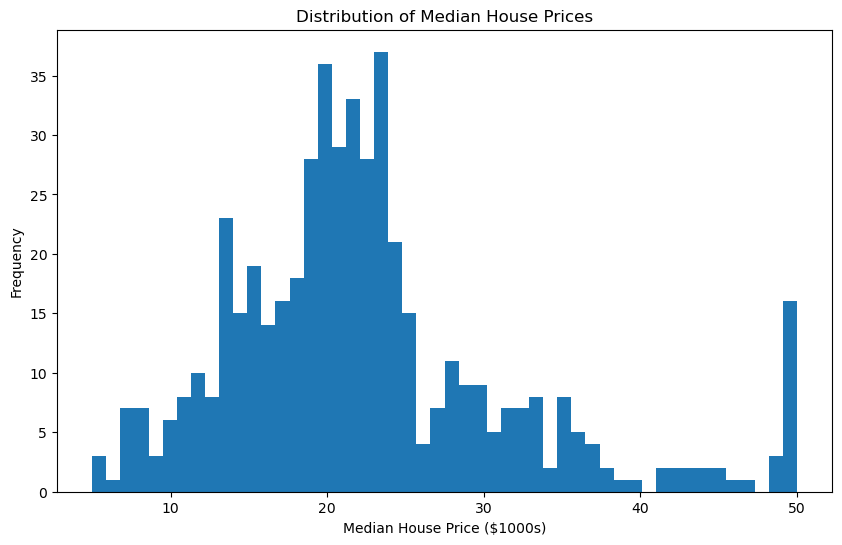

In [2]:
plt.figure(figsize=(10,6))  
plt.hist(df['MEDV'], bins=50)  
plt.title('Distribution of Median House Prices')  
plt.xlabel('Median House Price ($1000s)')  
plt.ylabel('Frequency')  
plt.show()  
  
df.dropna(inplace=True)

X = df.drop('MEDV', axis=1)
y = df['MEDV']

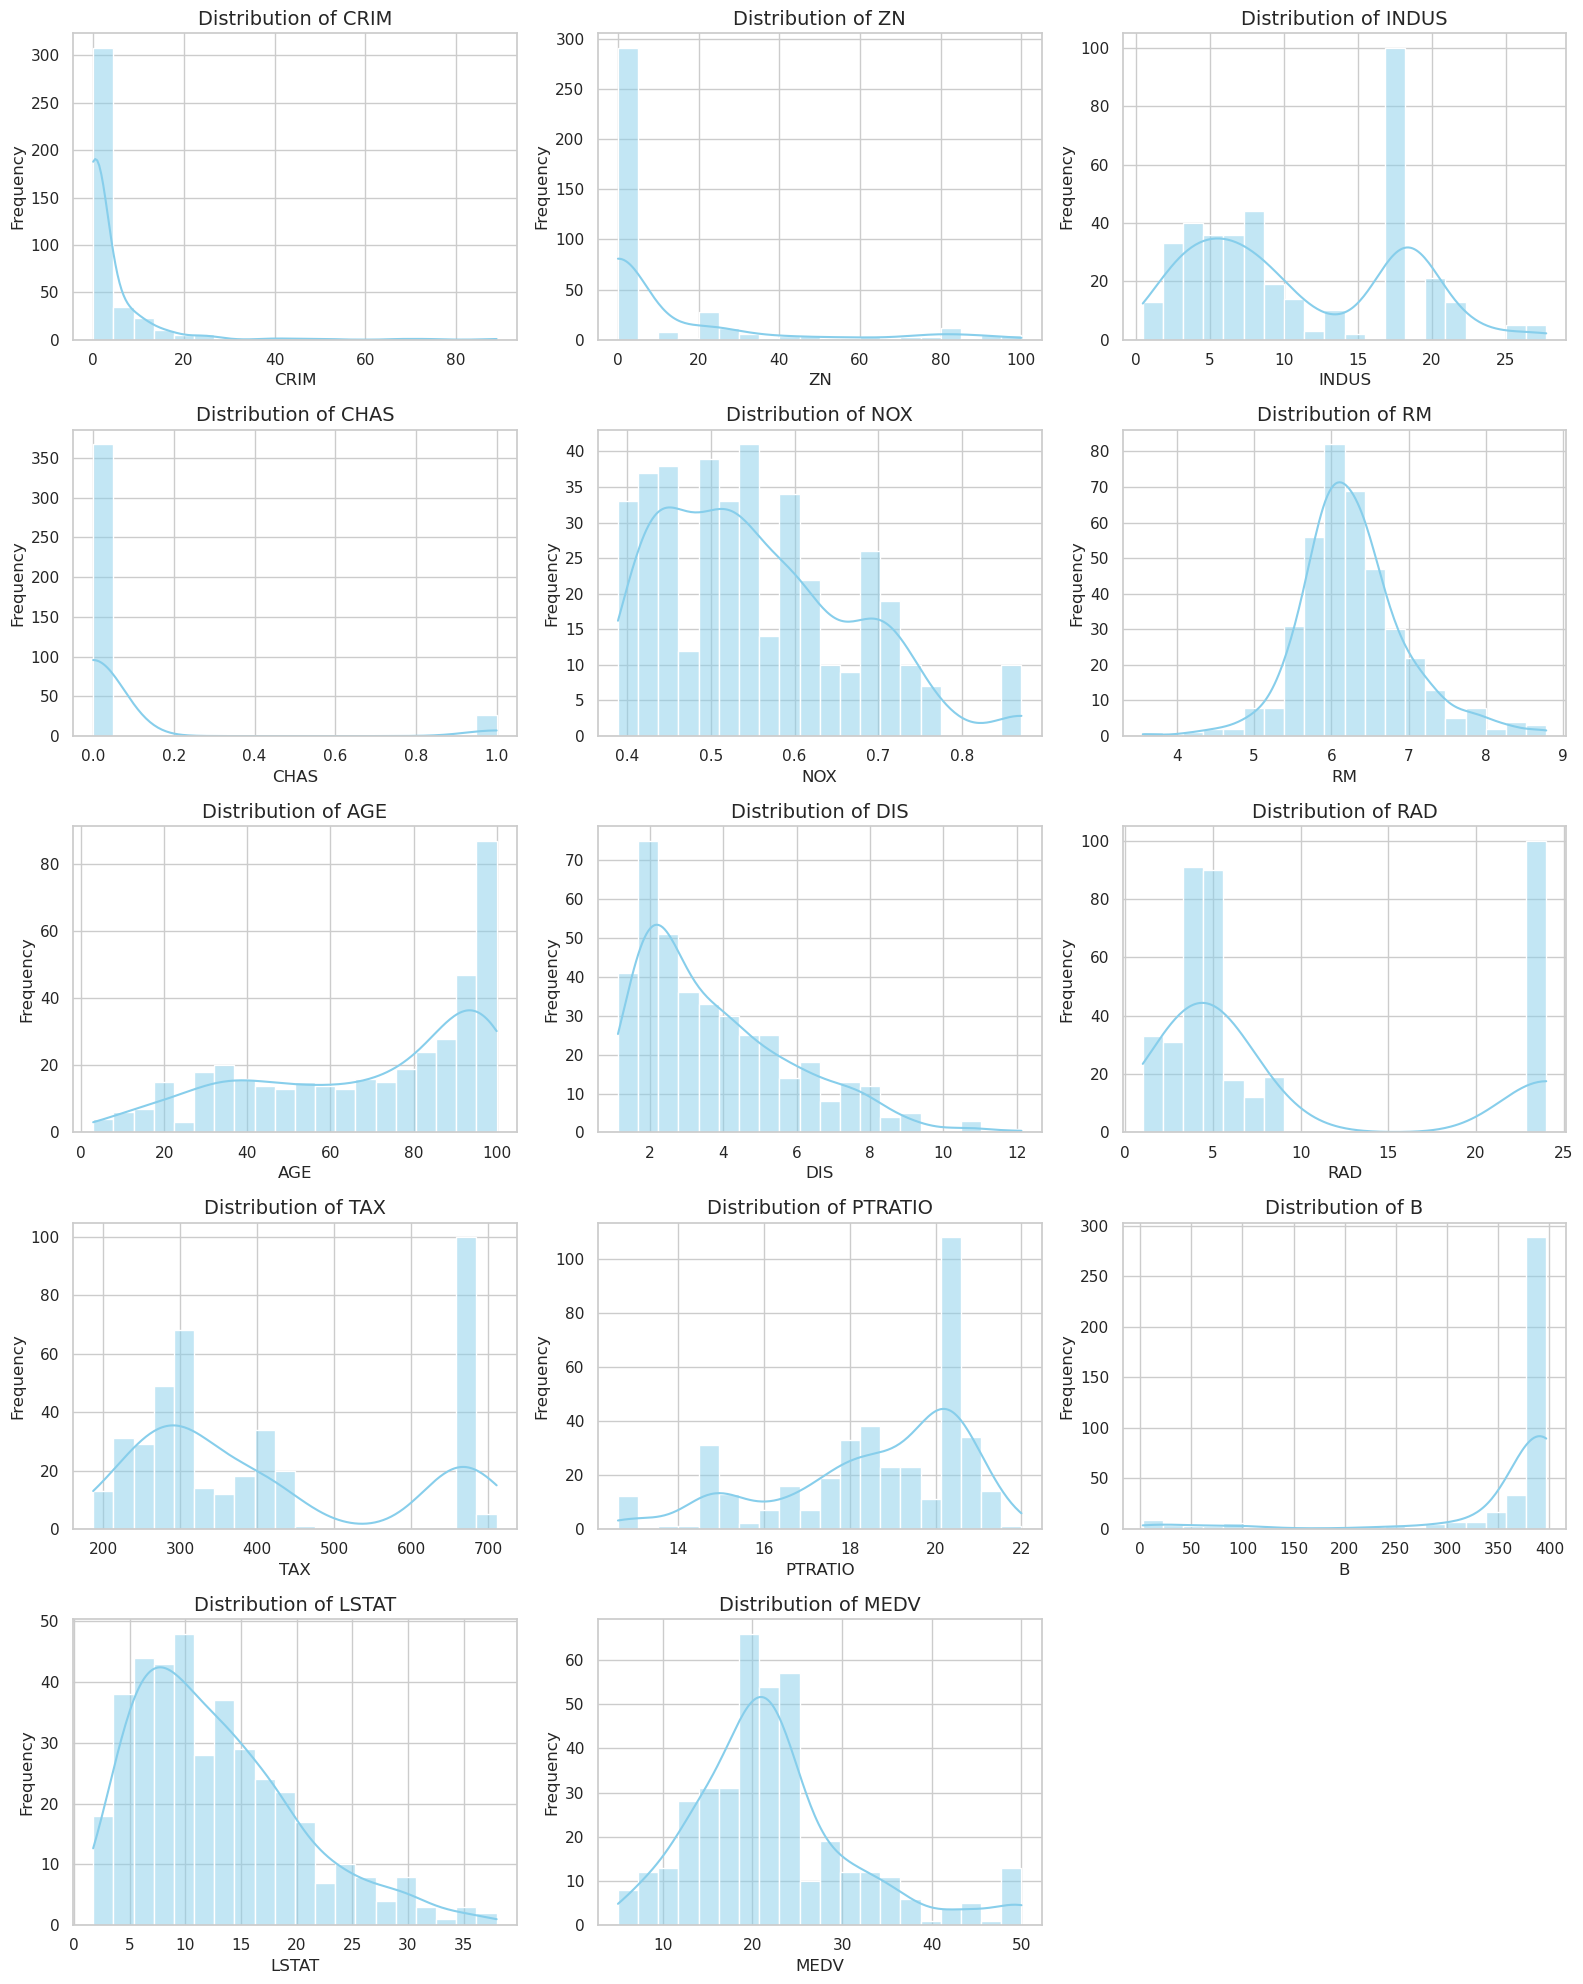

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style="whitegrid", palette="pastel")

num_columns = df.shape[1]  
plots_per_row = 3  
num_rows = (num_columns + plots_per_row - 1) // plots_per_row 

plt.figure(figsize=(16, num_rows * 4))  

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, plots_per_row, i + 1)  
    sns.histplot(df[column], bins=20, kde=True, color='skyblue')  
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/200, Train Loss: 0.8739, Val Loss: 0.6794
Epoch 101/200, Train Loss: 0.1362, Val Loss: 0.1759
Training Data Metrics:
  MSE: 0.09559504392853287, MAE: 0.22174151526212468, R2: 0.9044049560714671

Test Data Metrics:
  MSE: 0.14179505945108242, MAE: 0.233021284983614, R2: 0.8320253104318659



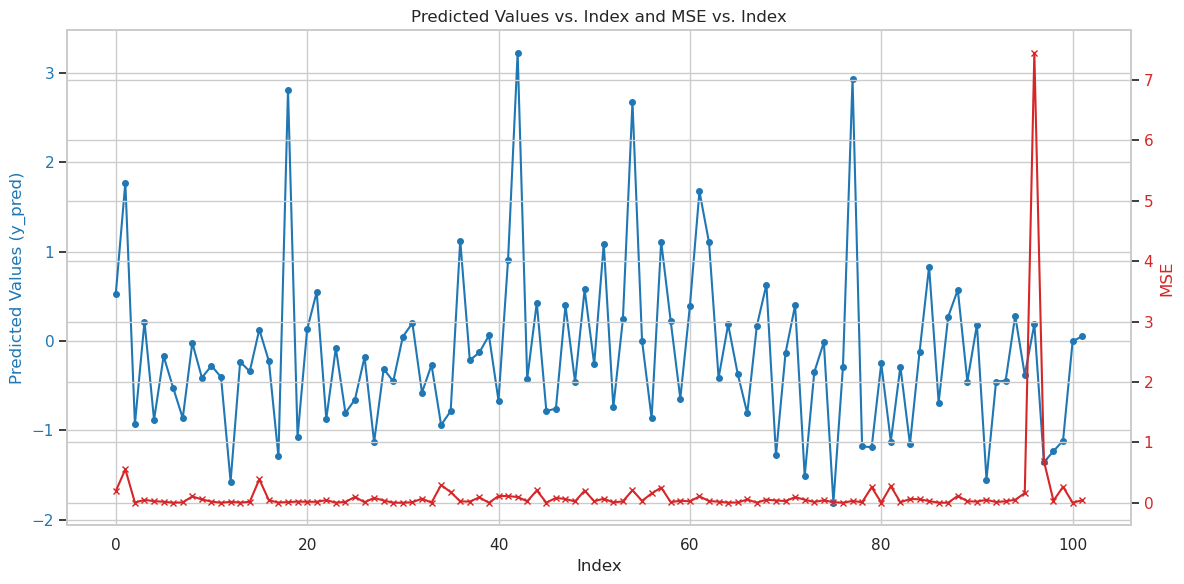

y_test =  [[ 1.03034948e+00]
 [-9.86690150e-01]
 [ 3.71794749e-04]
 [-7.18466795e-01]
 [-3.00038362e-01]
 [-5.36074914e-01]
 [-9.43774413e-01]
 [-3.42954099e-01]
 [-6.43364256e-01]]
y_test_pred =  [[ 1.77429855]
 [-0.93164003]
 [ 0.21853973]
 [-0.88188527]
 [-0.16873206]
 [-0.52364477]
 [-0.86264552]
 [-0.02003055]
 [-0.40936735]]
Layer 1:
  Weights - Max difference: 0.008502943766150989
  Biases - Max difference: 0.005866149741333448
  Relative difference (weights): 0.3333333333995332
  Relative difference (biases): 0.33333333465479353
Layer 2:
  Weights - Max difference: 0.008611112773147607
  Biases - Max difference: 0.008051898123187264
  Relative difference (weights): 0.33333333360946876
  Relative difference (biases): 0.3333333337656255
Layer 3:
  Weights - Max difference: 0.019560708306081052
  Biases - Max difference: 0.028497995640887536
  Relative difference (weights): 0.3333333332682629
  Relative difference (biases): 0.3333333324212229
None


In [9]:
import numpy as np  
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))  
# imports
from typing import List, Tuple
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

from models.MLP.MLP import MLP_Regressor

data_path = '../../data/external/HousingData.csv'
df = pd.read_csv(data_path)

df = df.fillna(df.median())  

X = df.drop(columns=['MEDV'])
y = df['MEDV'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_test_before = X_test.copy()

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

mlp = MLP_Regressor(input_size=X_train.shape[1], hidden_layers=[32, 32], output_size=1,
                    learning_rate=0.01, activation='sigmoid', optimizer='sgd',
                    batch_size=32, epochs=200,  patience=10)

mlp.fit(X_train, y_train, validation_split=0.2)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# print(np.sum((y_test_pred - y_test)**2))
# print(np.sum((y_test_pred - np.mean(y_test))**2))
# print(mean_squared_error(y_test,np.mean(y_test)*np.ones(y_test.shape[0])))

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Data Metrics:\n  MSE: {train_mse}, MAE: {train_mae}, R2: {train_r2}\n")
print(f"Test Data Metrics:\n  MSE: {test_mse}, MAE: {test_mae}, R2: {test_r2}\n")


mse_values = (y_test - y_test_pred) ** 2

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Index')
ax1.set_ylabel('Predicted Values (y_pred)', color='tab:blue')
ax1.plot(y_test_pred, label='y_pred', color='tab:blue', marker='o', linestyle='-', markersize=4)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('MSE', color='tab:red')
ax2.plot(mse_values, label='MSE', color='tab:red', marker='x', linestyle='-', markersize=4)
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Predicted Values vs. Index and MSE vs. Index')
fig.tight_layout()  
plt.show()

print("y_test = ",y_test[1:10])
print("y_test_pred = ",y_test_pred[1:10])

print(mlp.check_gradients(X_train, y_train))

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn


data_path = '../../data/external/HousingData.csv'

df = pd.read_csv(data_path)

X shape =  (404, 13)
Y shape =  (404, 1)
Test MSE: 13.709773893424524
Test MAE: 2.3850279017638925
Test R2: 0.8130496845709965


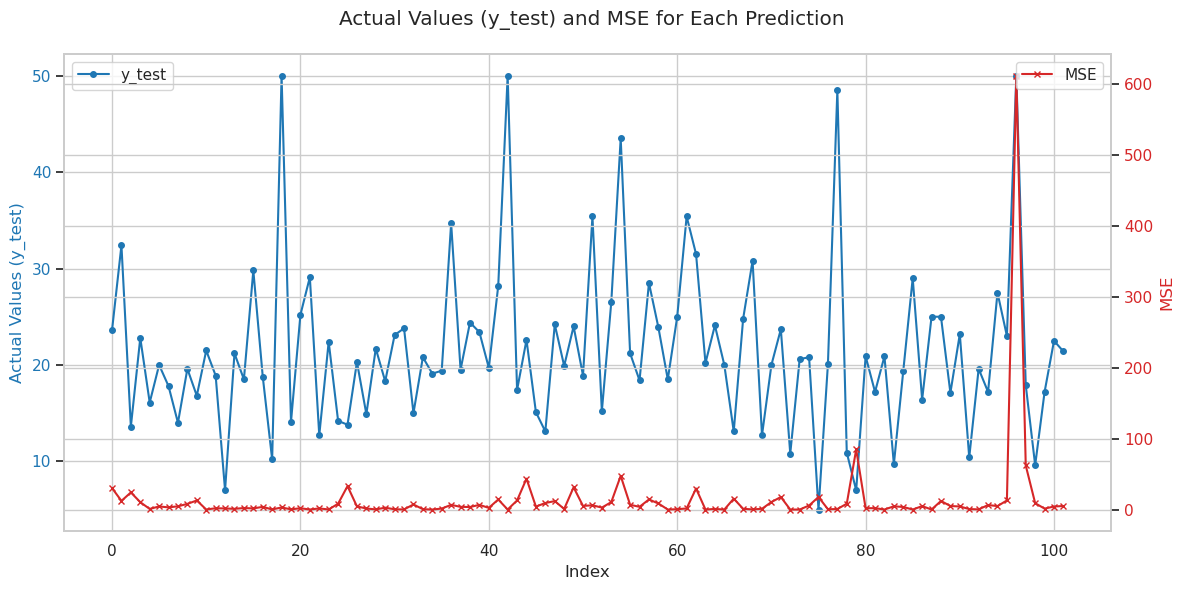

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from models.MLP.MLP import MLP_Reg

data_path = '../../data/external/HousingData.csv'
df = pd.read_csv(data_path)
df = df.fillna(df.median())
X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
Y_test = scaler.transform(y_test.values.reshape(-1, 1))

mlp = MLP_Reg(hidden_neurons=[32, 32], num_hid_layers=2, epochs=200, 
              learning_rate=0.01, activation='sigmoid', optimizer='sgd', batch_size=16)

print("X shape = ",X_train.shape)
print("Y shape = ",Y_train.shape)

mlp.train(pd.DataFrame(X_train), pd.Series(y_train))

y_train_pred = mlp.predict(X_train).flatten()
y_test_pred = mlp.predict(X_test).flatten()

test_mse = mean_squared_error(y_test, y_test_pred)

mse_values = (y_test.values - y_test_pred) ** 2

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Test R2: {r2_score(y_test, y_test_pred)}")

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Index')
ax1.set_ylabel('Actual Values (y_test)', color='tab:blue')
ax1.plot(y_test.values, label='y_test', color='tab:blue', marker='o', linestyle='-', markersize=4)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('MSE', color='tab:red')
ax2.plot(mse_values, label='MSE', color='tab:red', marker='x', linestyle='-', markersize=4)
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.suptitle('Actual Values (y_test) and MSE for Each Prediction')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()